In [1]:
import numpy as np
import cv2
import numpy
import math
import os
import sklearn.linear_model
import sklearn.datasets
import matplotlib.pyplot as plt
import Data_File
import cost_functions
plt.close('all')


In [2]:
def flat_coordinates(x,y,h,w):
    return (x-1)*w + y



# Training 

In [3]:
train_prop = .5
test_prop = .3
v_prop = .2

Data_File.data_writer('Dataset',train_prop,test_prop,v_prop)


train_x,train_y = Data_File.Data('faces')
test_x,test_y = Data_File.Data('test')
v_x,v_y = Data_File.Data('cross_val')
(h,w) = train_y[0].shape

m = len(train_x) 

X = train_x.reshape((len(train_x),int(h*w/4)))
y = train_y.reshape((len(train_y),int(h*w)))



    Now we define the Linear Regressor

In [4]:
model = sklearn.linear_model.Ridge (alpha = .5)

model.fit(X,y)



Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [5]:
Train_error = cost_functions.mse_model(X,y,model)
print ("Training Error is ",Train_error)
s = cost_functions.avg_psnr(X,y,model)
print ("Average training PSNR : ", s)



('Training Error is ', 4.2823610843435156e-06)
('Average training PSNR : ', 54.87622297573774)


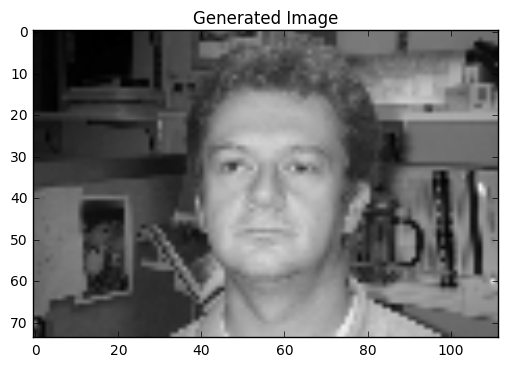

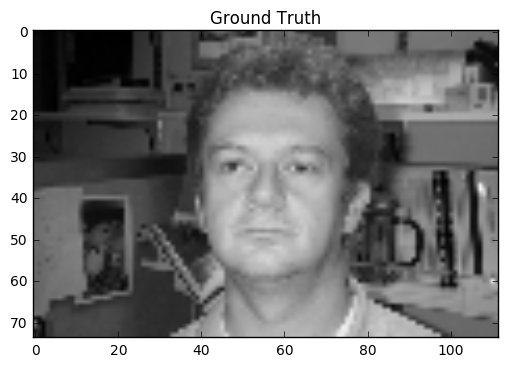

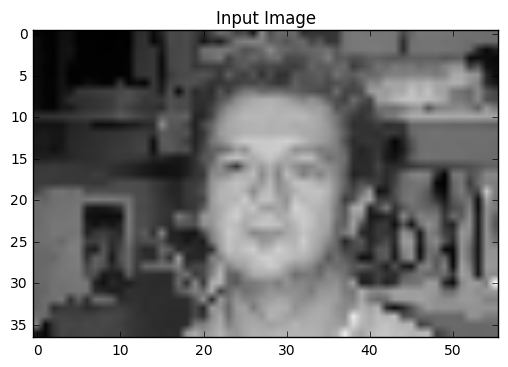

In [6]:
preds = model.predict(X)
plt.close('all')
img_id = 0
figure = plt.figure()
plt.imshow(preds[img_id].reshape((h,w)),cmap='gray')
plt.title('Generated Image')
plt.savefig('Lin_train_gen.png')
figure = plt.figure()
plt.imshow(y[img_id].reshape((h,w)),cmap='gray')
plt.title("Ground Truth")
plt.savefig('Lin_train_grd_truth.png')
figure = plt.figure()
plt.imshow(X[img_id].reshape((h//2,w//2)),cmap='gray')
plt.title("Input Image")
plt.savefig('Lin_train_input.png')
plt.show()

The Topmost image is from the Training Dataset. The Regressor was able to converge. The Reconstruction Error is pretty low.

In [7]:
y = v_y.reshape((len(v_y),w*h))/255
X = v_x.reshape((len(v_x),int(h*w*.25)))/255

In [8]:
pred = model.predict(X)
v_error = cost_functions.mse_model(X,y,model)
print ("Validation Set Error is ",v_error)
s = cost_functions.avg_psnr(X,y,model)
print ("Average Validation PSNR is ",s)

('Validation Set Error is ', 0.012803511954094231)
('Average Validation PSNR is ', 19.518171650545554)


# Verifying the Model on Test Data

In [12]:
y = test_y.reshape((len(test_y),w*h))/255
X = test_x.reshape((len(test_x),int(h*w*.25)))/255

In [13]:
pred = model.predict(X[:,:])
test = cost_functions.mse_model(X,y,model)
reshaped = pred.reshape((len(pred),h,w))
print ("Testing Error is ",test)
s = cost_functions.avg_psnr(X,y,model)
print ("Average Testing PSNR : ", s)
y = y.reshape((len(X),h,w))

('Testing Error is ', 0.012806021479384947)
('Average Testing PSNR : ', 19.31210238161171)


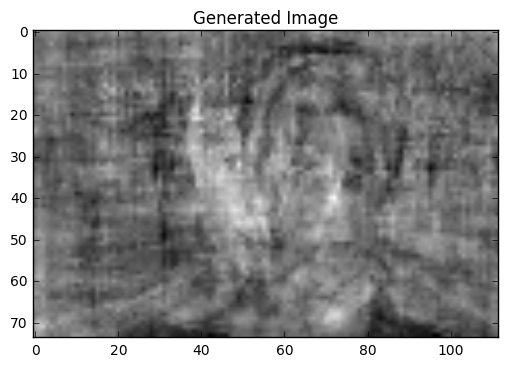

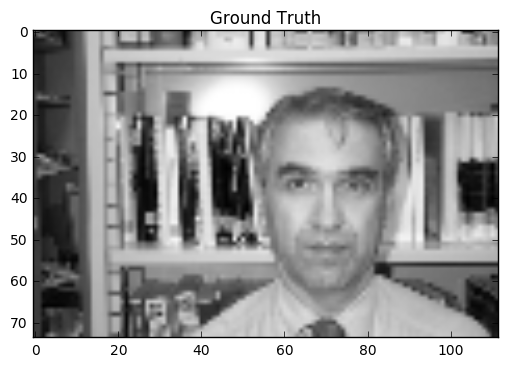

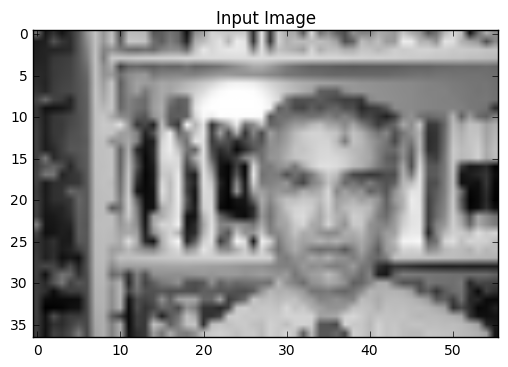

In [14]:
preds = model.predict(X)
plt.close('all')
img_id = 0
figure = plt.figure()
plt.imshow(preds[img_id].reshape((h,w)),cmap='gray')
plt.title('Generated Image')
plt.savefig('lin_gen_test.png')
figure = plt.figure()
plt.imshow(y[img_id].reshape((h,w)),cmap='gray')
plt.title("Ground Truth")
plt.savefig('lin_truth_test.png')
figure = plt.figure()
plt.imshow(X[img_id].reshape((h//2,w//2)),cmap='gray')
plt.title("Input Image")
plt.savefig('lin_input_test.png')
plt.show()

We can see that the resulting image is not good. Linear Regression model fails to generalize the results for new images.
